# Create THERMOCALC KLB1 phase diagram

The grid that is imported below is calculated using the Holland et al. (2018) model.

This notebook will generate a phaseDiagram object containing mass fractions, 

Import required libraries:

In [2]:
import pyMelt as m
from pyMelt import phaseDiagramTools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
klb1 = pd.read_csv('klb1_thermocalc_grid.csv')
klb1.head()

,pressure,temperature,X,cpx,cpx_Al2O3,cpx_CaO,cpx_Cr2O3,cpx_FeO,cpx_K2O,cpx_MgO,...,grt_SiO2,grt_TiO2,grt_xAlM2,grt_xCaM1,grt_xCrM2,grt_xFe3M2,grt_xFeM1,grt_xMgM1,grt_xMgM2,grt_xTiM2
0,0.01,1100.1,NaN,0.05621,0.856793,19.437163,0.271073,3.068039,0.132163,25.389237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.01,1105.0,NaN,0.05591,0.864334,19.380258,0.271472,3.076061,0.132020,25.441044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.01,1110.0,NaN,0.05560,0.872004,19.321117,0.271847,3.084343,0.131903,25.494800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.01,1115.0,NaN,0.05527,0.879675,19.260842,0.272195,3.092751,0.131810,25.549515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.01,1120.0,NaN,0.05494,0.887348,19.199420,0.272519,3.101241,0.131693,25.605214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using lattice-strain model partition coefficients requires the pyrope proportion, which is more convenient to access directly:

In [4]:
# Properties needed to calculate garnet Ds + oxides
klb1['grt_pyrope'] = klb1['grt_xMgM1']
klb1['grt_grossular'] = klb1['grt_xCaM1'] - klb1['grt_xCrM2'] - klb1['grt_xFe3M2']
klb1['grt_almandine'] = klb1['grt_xFeM1']
klb1['grt_uvarovite'] = klb1['grt_xCrM2']
klb1['grt_spessartine'] = 0.0
klb1['grt_andradite'] = klb1['grt_xFe3M2']

# Properties needed for plagioclase Ds + oxides:
klb1['plg_anorthite'] = klb1['plg_x(Ca)']
klb1['plg_albite'] = klb1['plg_x(Na)']


In [5]:
klb1_grid = phaseDiagramTools.gridsThermocalc(klb1)

In [7]:
phased = phaseDiagramTools.phaseDiagram(klb1_grid, minerals=['olv', 'cpx', 'opx', 'grt', 'spn', 'plg'])

In [8]:
f = open( "thermocalc_klb1.p", "wb" )
pickle.dump(phased, f)
f.close()

## Check the interpolated phase diagram

### Mass proportions

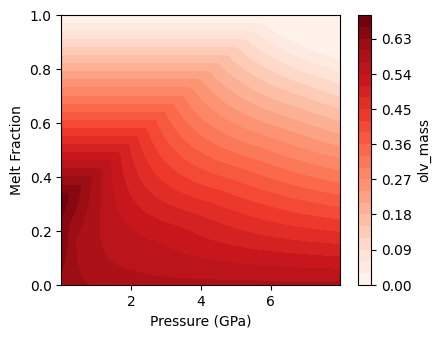

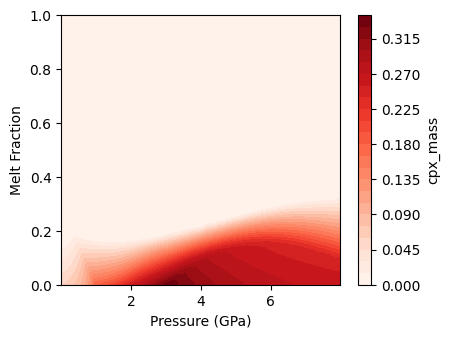

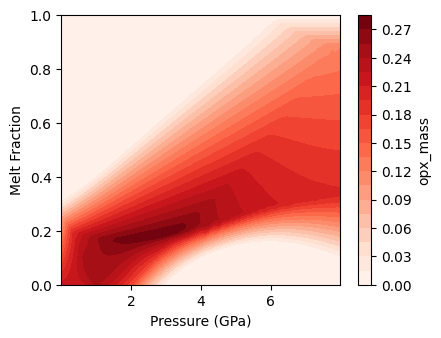

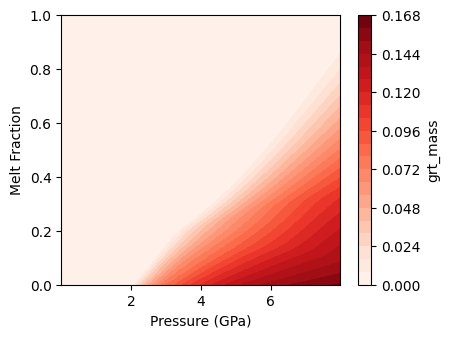

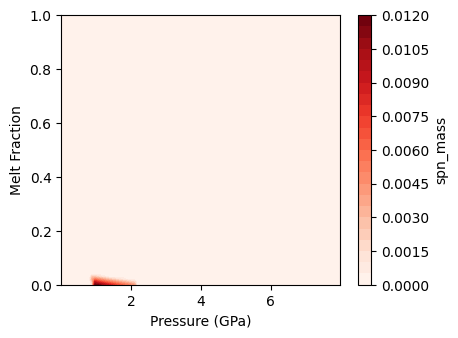

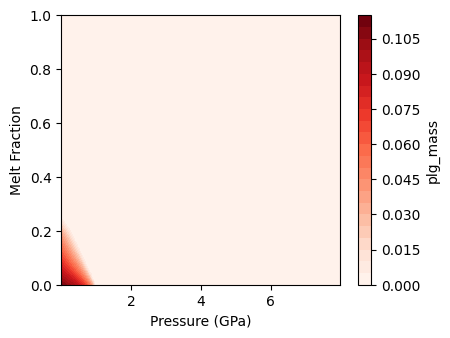

In [8]:
phases = ['olv', 'cpx', 'opx', 'grt', 'spn', 'plg']

for ph in phases:
    f, a = phased.plot_TxSection(ph + '_mass', mask_mineral_out=False)
    plt.show()

### Liquid compositions

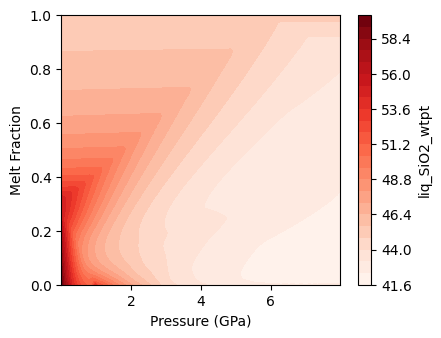

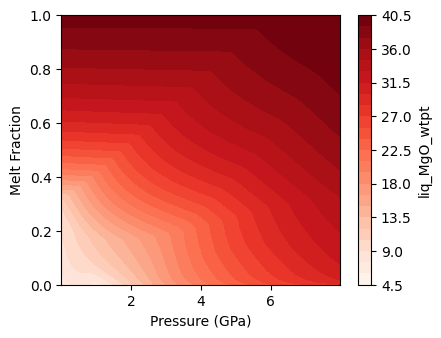

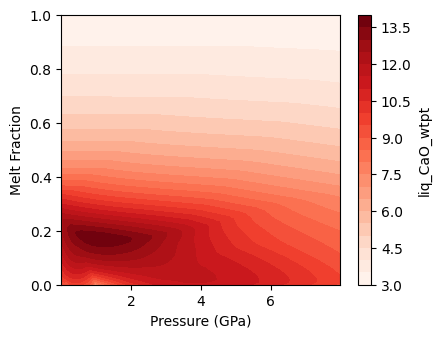

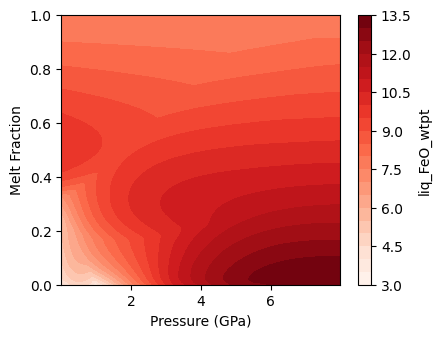

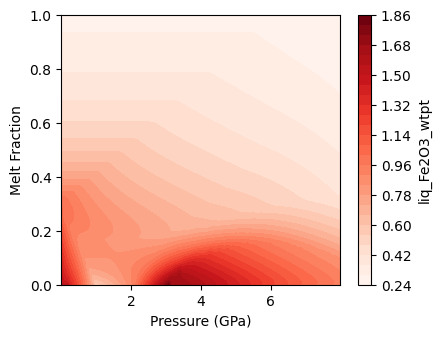

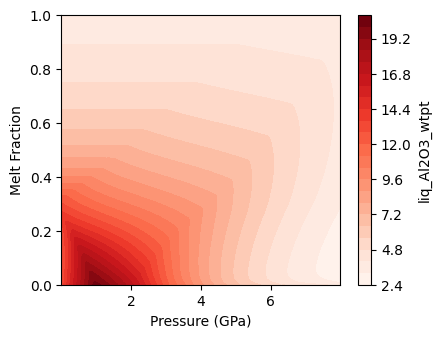

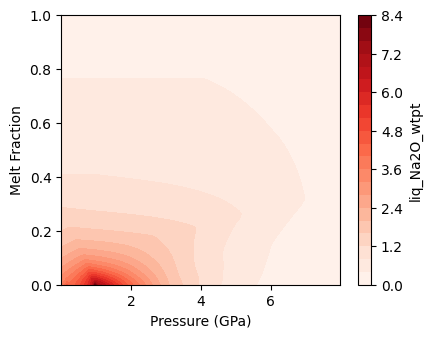

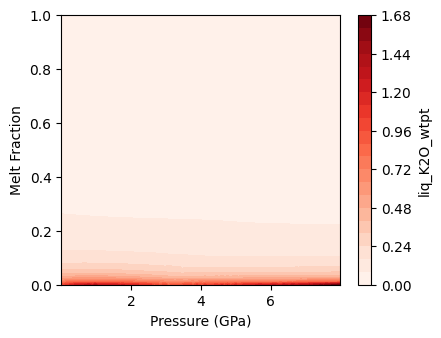

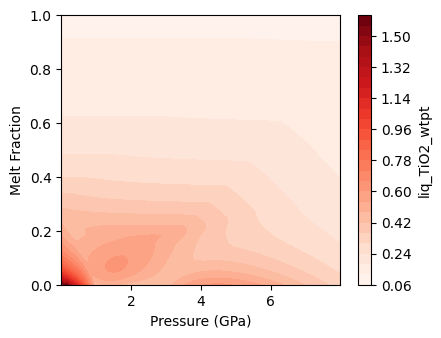

In [9]:
oxides = ['SiO2', 'MgO', 'CaO', 'FeO', 'Fe2O3', 'Al2O3', 'Na2O', 'K2O', 'TiO2']

for ox in oxides:
    f, a = phased.plot_TxSection('liq_' + ox + '_wtpt')
    plt.show()


### Important parameters for D calculations

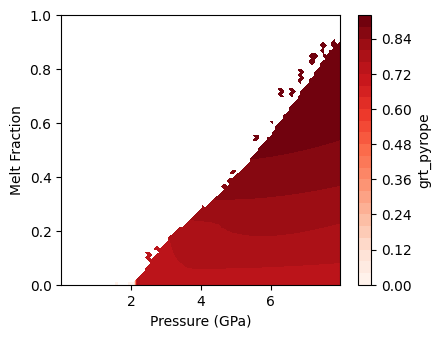

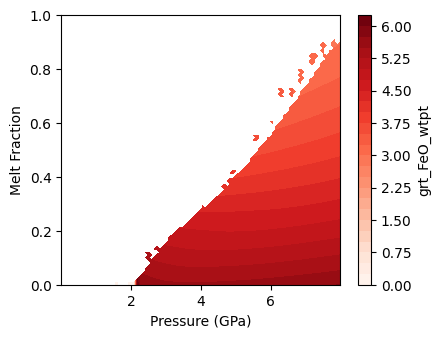

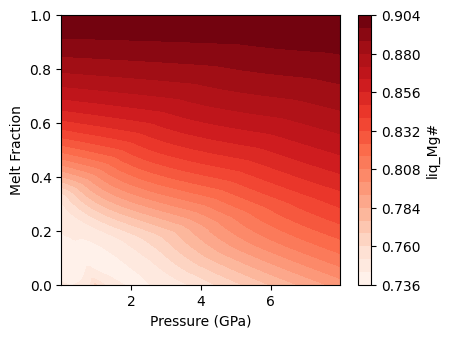

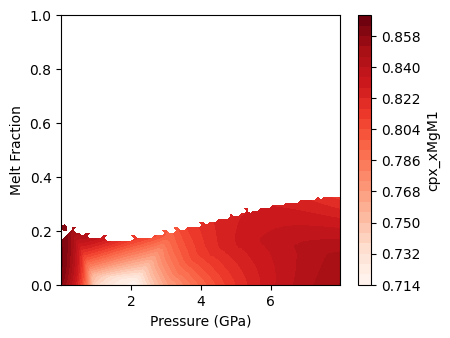

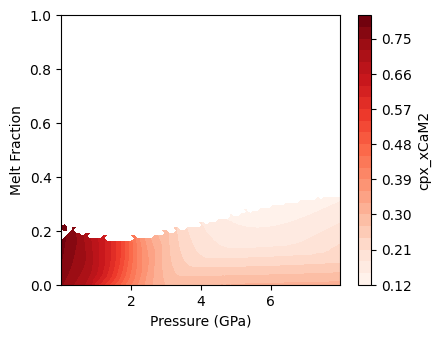

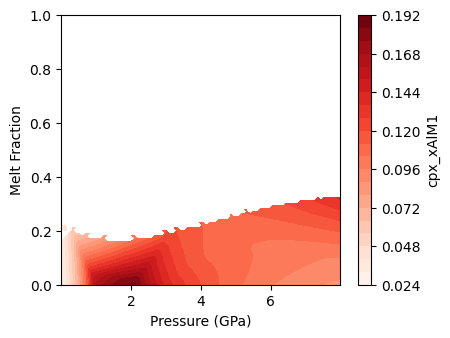

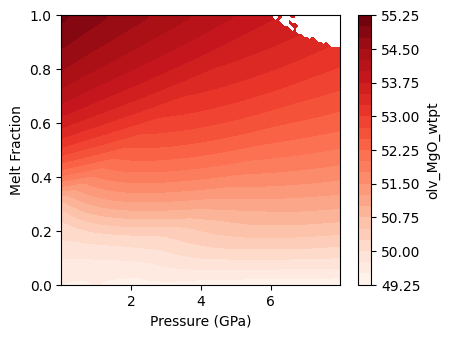

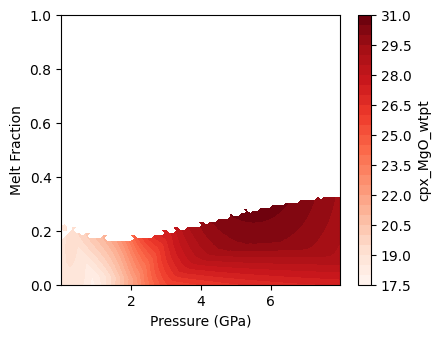

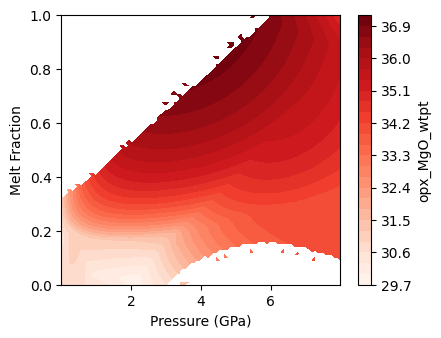

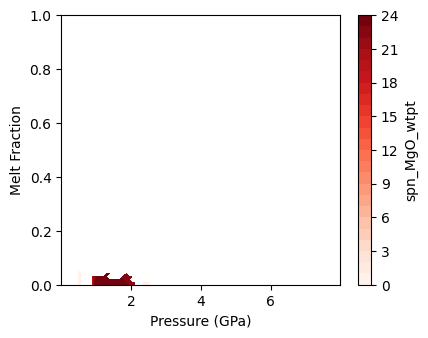

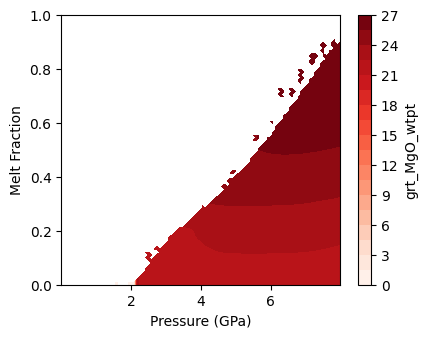

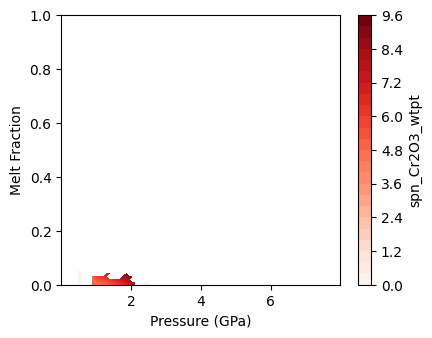

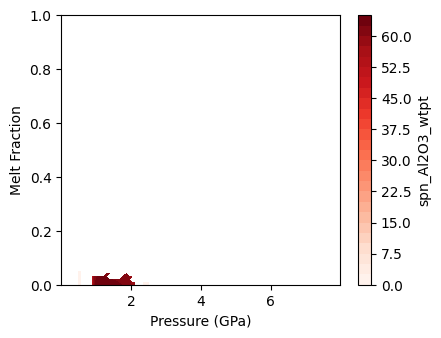

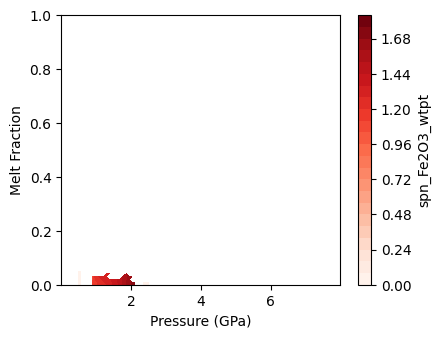

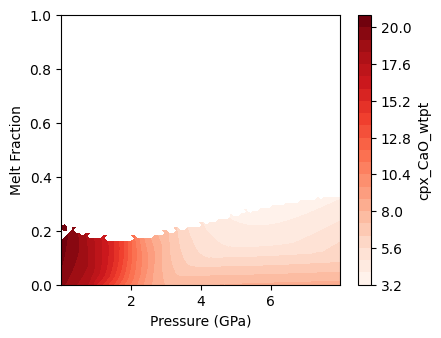

In [13]:
params = ['grt_pyrope', 'grt_FeO_wtpt', 'liq_Mg#', 'cpx_xMgM1', 'cpx_xCaM2', 'cpx_xAlM1',
          'olv_MgO_wtpt', 'cpx_MgO_wtpt', 'opx_MgO_wtpt', 'spn_MgO_wtpt', 'grt_MgO_wtpt',
          'spn_Cr2O3_wtpt', 'spn_Al2O3_wtpt', 'spn_Fe2O3_wtpt', 'cpx_CaO_wtpt']

for pr in params:
    if pr[:3] == 'liq':
        mask=False
    else:
        mask=True
    f, a = phased.plot_TxSection(pr, mask_mineral_out=mask)
    plt.show()